In [186]:
library(ggplot2)
library(tidyverse)
library(readr)
library(lubridate)
library(purrr)
library(ggpubr)
library(zoo)
library(factoextra)

In [187]:
covid=read_csv("../input//novel-corona-virus-2019-dataset/covid_19_data.csv");


── Column specification ────────────────────────────────────────────────────────
cols(
  SNo = col_double(),
  ObservationDate = col_character(),
  `Province/State` = col_character(),
  `Country/Region` = col_character(),
  `Last Update` = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double()
)




In [188]:
head(covid)
summary(covid)
covid %>%
  summarise_all(funs(sum(is.na(.))))
nrow(covid)
covid$ObservationDate=ymd(as.Date(covid$ObservationDate,format='%m/%d/%Y'))



covid

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0


      SNo         ObservationDate    Province/State     Country/Region    
 Min.   :     1   Length:172480      Length:172480      Length:172480     
 1st Qu.: 43121   Class :character   Class :character   Class :character  
 Median : 86240   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 86240                                                           
 3rd Qu.:129360                                                           
 Max.   :172480                                                           
 Last Update          Confirmed           Deaths        Recovered      
 Length:172480      Min.   :-302844   Min.   : -178   Min.   :-854405  
 Class :character   1st Qu.:    457   1st Qu.:    6   1st Qu.:     10  
 Mode  :character   Median :   4016   Median :   76   Median :    858  
                    Mean   :  33232   Mean   : 1050   Mean   :  21028  
                    3rd Qu.:  18843   3rd Qu.:  554   3rd Qu.:   7229  
                    Max.   :2290891   Max. 

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,47883,0,0,0,0,0


[1] 172480

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0
6,2020-01-22,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
7,2020-01-22,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
8,2020-01-22,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
9,2020-01-22,Hainan,Mainland China,1/22/2020 17:00,4,0,0


In [189]:

covid=covid%>%select(-`Province/State`)
covid

SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
2,2020-01-22,Mainland China,1/22/2020 17:00,14,0,0
3,2020-01-22,Mainland China,1/22/2020 17:00,6,0,0
4,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
5,2020-01-22,Mainland China,1/22/2020 17:00,0,0,0
6,2020-01-22,Mainland China,1/22/2020 17:00,26,0,0
7,2020-01-22,Mainland China,1/22/2020 17:00,2,0,0
8,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
9,2020-01-22,Mainland China,1/22/2020 17:00,4,0,0


In [190]:
covid

SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
2,2020-01-22,Mainland China,1/22/2020 17:00,14,0,0
3,2020-01-22,Mainland China,1/22/2020 17:00,6,0,0
4,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
5,2020-01-22,Mainland China,1/22/2020 17:00,0,0,0
6,2020-01-22,Mainland China,1/22/2020 17:00,26,0,0
7,2020-01-22,Mainland China,1/22/2020 17:00,2,0,0
8,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
9,2020-01-22,Mainland China,1/22/2020 17:00,4,0,0


In [191]:
grouped_country=covid%>%group_by(`Country/Region`)
grouped_date=covid%>%group_by(ObservationDate)


In [192]:
grouped_country=grouped_country%>%summarise(Confirmed=sum(Confirmed),Fatality_Rate=sum(Deaths)/sum(Confirmed)) 

`summarise()` ungrouping output (override with `.groups` argument)



In [193]:
grouped_country %>% arrange(desc(Confirmed)) %>% .[1:20,]

Country/Region,Confirmed,Fatality_Rate
<chr>,<dbl>,<dbl>
US,1281680801,0.03006028
India,833624817,0.01623739
Brazil,711618065,0.03150914
Russia,224217320,0.01654970
France,145444435,0.05343471
Spain,141619421,0.05295266
UK,123052469,0.08151772
Peru,119805877,0.03941352
Colombia,117658640,0.03040518


`summarise()` ungrouping output (override with `.groups` argument)



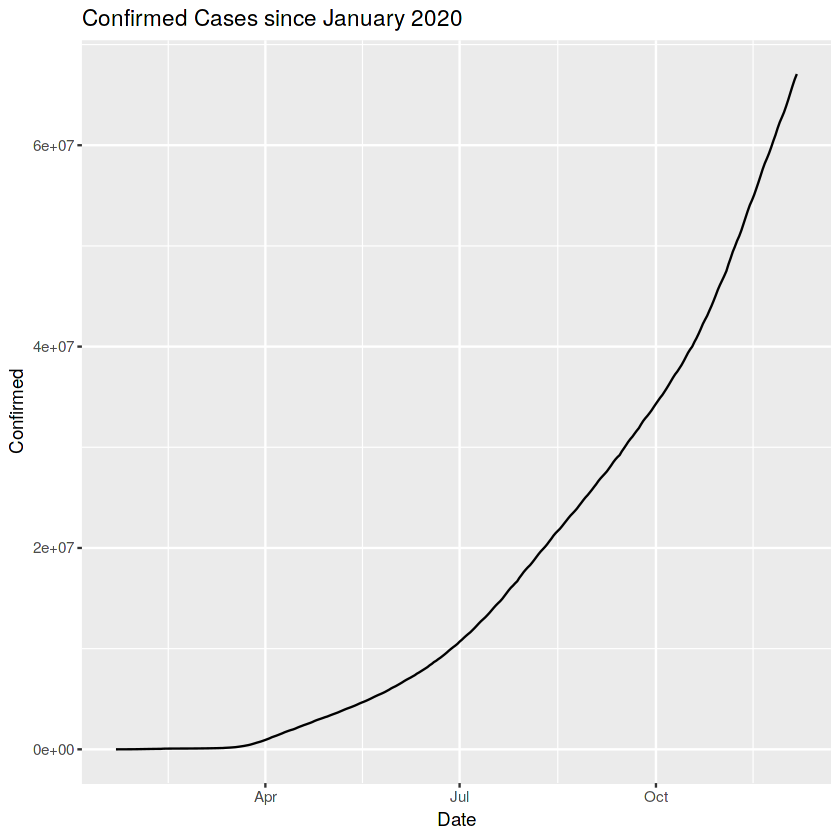

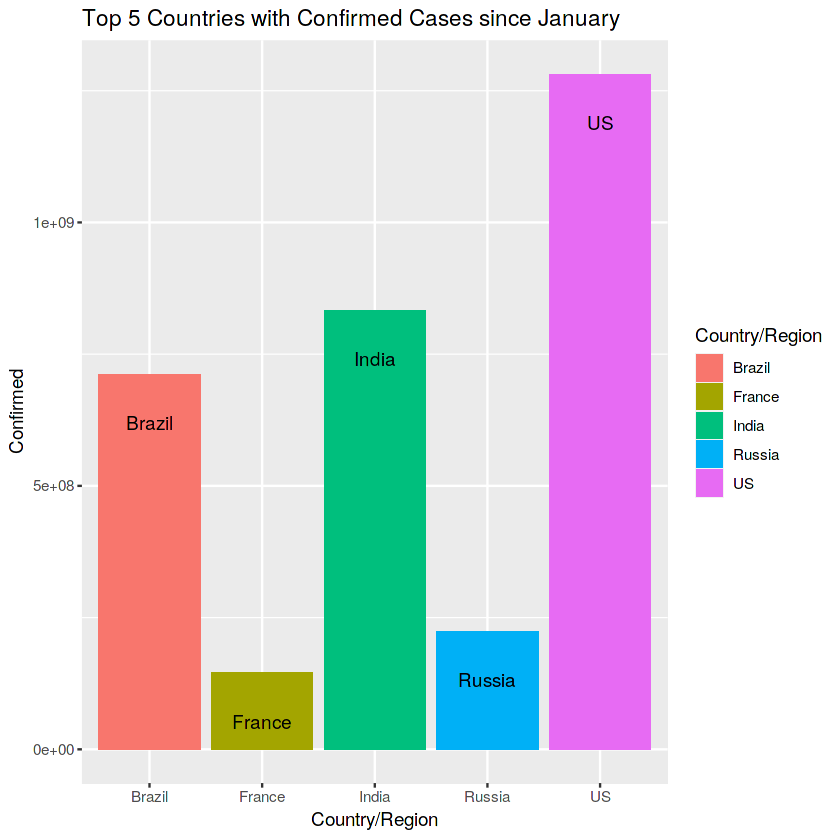

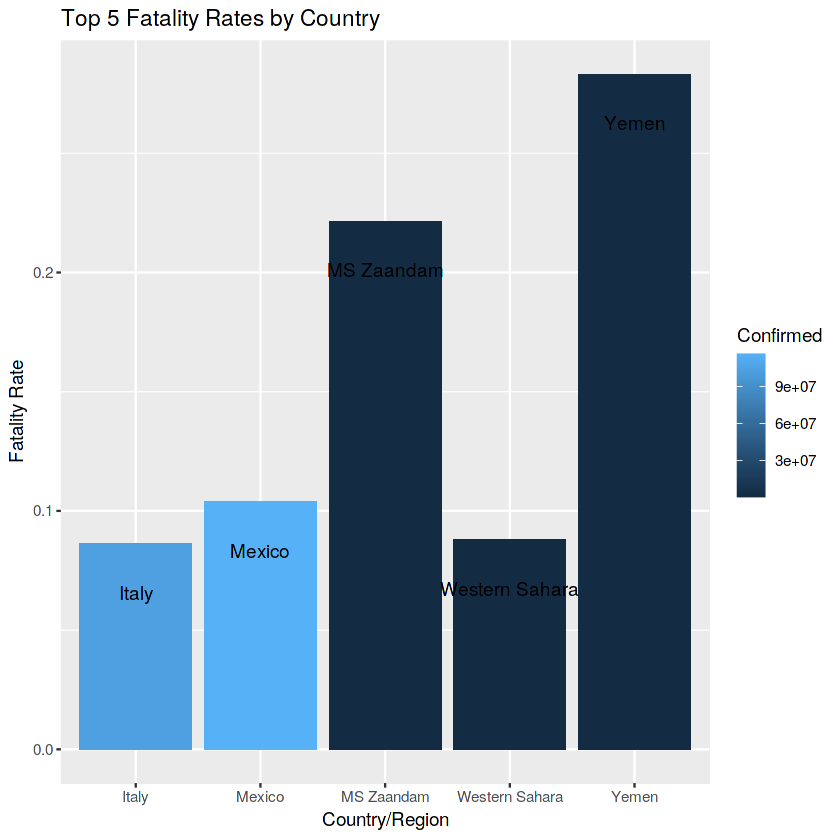

In [194]:
grouped_date%>%summarise(Confirmed=sum(Confirmed)) %>% ggplot(aes(x=ObservationDate,y=Confirmed))+geom_line()+ggtitle("Confirmed Cases since January 2020") + xlab("Date")

grouped_country %>% arrange(desc(Confirmed)) %>% .[1:5,]%>% ggplot(aes(x=`Country/Region`,y=Confirmed,fill=`Country/Region`,label=`Country/Region`))+geom_bar(stat="identity")+geom_text(vjust=4) + ggtitle("Top 5 Countries with Confirmed Cases since January")

grouped_country %>% arrange(desc(Fatality_Rate)) %>% .[1:5,]%>% ggplot(aes(x=`Country/Region`,y=Fatality_Rate,fill=Confirmed,label=`Country/Region`))+geom_bar(stat="identity")+geom_text(vjust=4) + ggtitle("Top 5 Fatality Rates by Country") + ylab("Fatality Rate")




In [195]:
grouped_date=covid%>%filter(`Country/Region`=='US')%>%group_by(ObservationDate=floor_date(ObservationDate,"1 week"))



`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



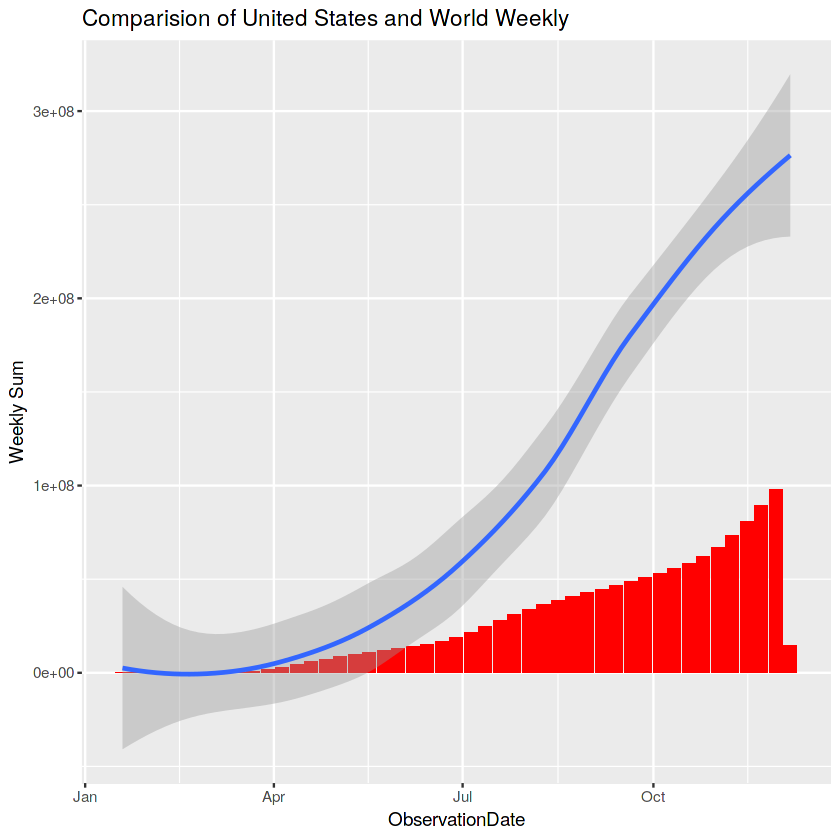

In [196]:
USCovidWeekly=covid%>%filter(`Country/Region`=='US')%>%group_by(ObservationDate=floor_date(ObservationDate,"1 week")) %>% summarise('Weekly Sum'=sum(Confirmed)) %>%ggplot(aes(x=ObservationDate,y=`Weekly Sum`))+geom_bar(stat="identity",fill='Red')
WorldCovidWeekly= covid%>%filter(`Country/Region`!='US') %>% group_by(ObservationDate=floor_date(ObservationDate,"1 week"))%>% summarise('Weekly Sum' = sum(Confirmed)) 

USCovidWeekly+geom_smooth(data=WorldCovidWeekly,aes(x=ObservationDate,y=`Weekly Sum`))+ggtitle("Comparision of United States and World Weekly")





`summarise()` ungrouping output (override with `.groups` argument)



ObservationDate,Confirmed,Death,Recovered
<date>,<dbl>,<dbl>,<dbl>
2020-01-19,3587,103,133
2020-01-26,46986,1045,995
2020-02-02,190527,4003,9185
2020-02-09,369228,8710,40771
2020-02-16,526906,14723,113874
2020-02-23,573261,19203,216677
2020-03-01,672190,22861,355731
2020-03-08,897463,32619,465791
2020-03-15,1580814,64341,582274


`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



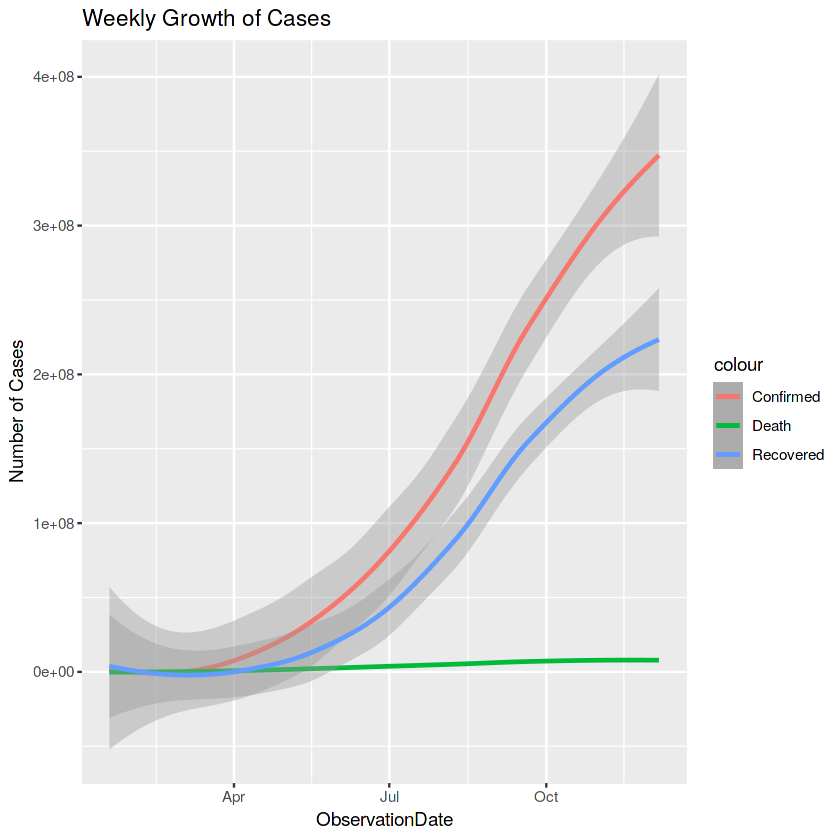

In [197]:
covid%>% group_by(ObservationDate=floor_date(ObservationDate,"1 week"))%>% summarise('Confirmed'=sum(Confirmed),'Death'=sum(Deaths),'Recovered'=sum(Recovered))

#covid%>% group_by(ObservationDate=floor_date(ObservationDate,"1 week")) %>% ggplot()+geom_smooth(aes(x=ObservationDate,y=Confirmed,color='red'))

covid%>% group_by(ObservationDate=floor_date(ObservationDate,"1 week"))%>% summarise('Confirmed'=sum(Confirmed),'Death'=sum(Deaths),'Recovered'=sum(Recovered)) %>% ggplot()+geom_smooth(aes(x=ObservationDate,y=Confirmed,color='Confirmed'))+geom_smooth(aes(x=ObservationDate,y=Death,color='Death')) + geom_smooth(aes(x=ObservationDate,y=Recovered,color='Recovered')) + ylab("Number of Cases")+ggtitle("Weekly Growth of Cases")




`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



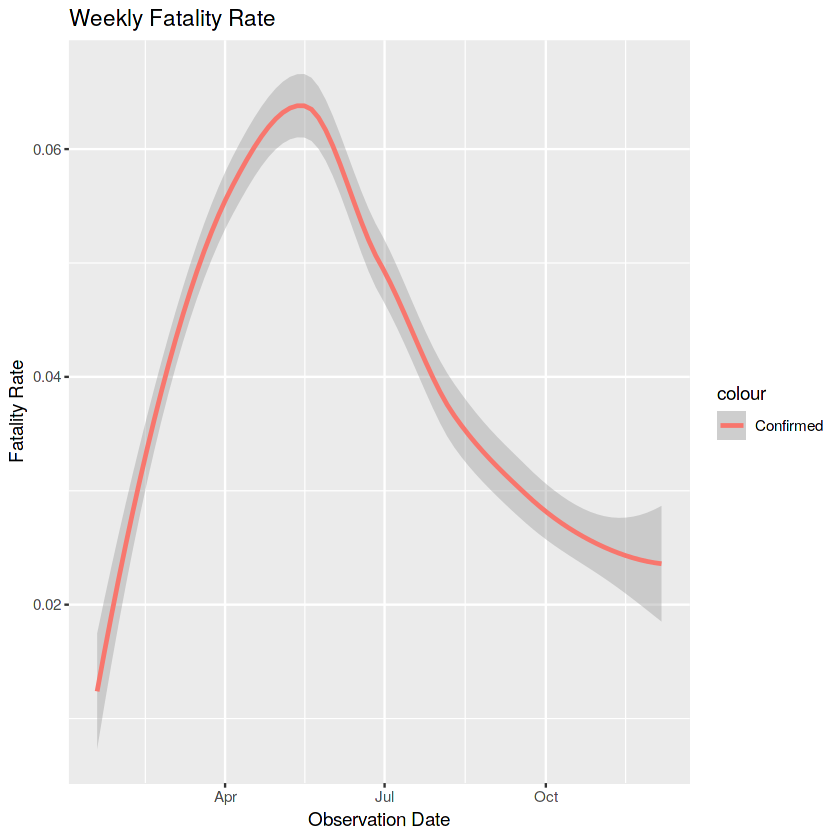

In [198]:
covid%>% group_by(ObservationDate=floor_date(ObservationDate,"1 week"))%>% summarise('Fatality Rate'=sum(Deaths)/sum(Confirmed)) %>% ggplot()+geom_smooth(aes(x=ObservationDate,y=`Fatality Rate`,color='Confirmed'))+xlab("Observation Date") + ylab("Fatality Rate")+ggtitle("Weekly Fatality Rate")


`summarise()` regrouping output by 'ObservationDate' (override with `.groups` argument)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



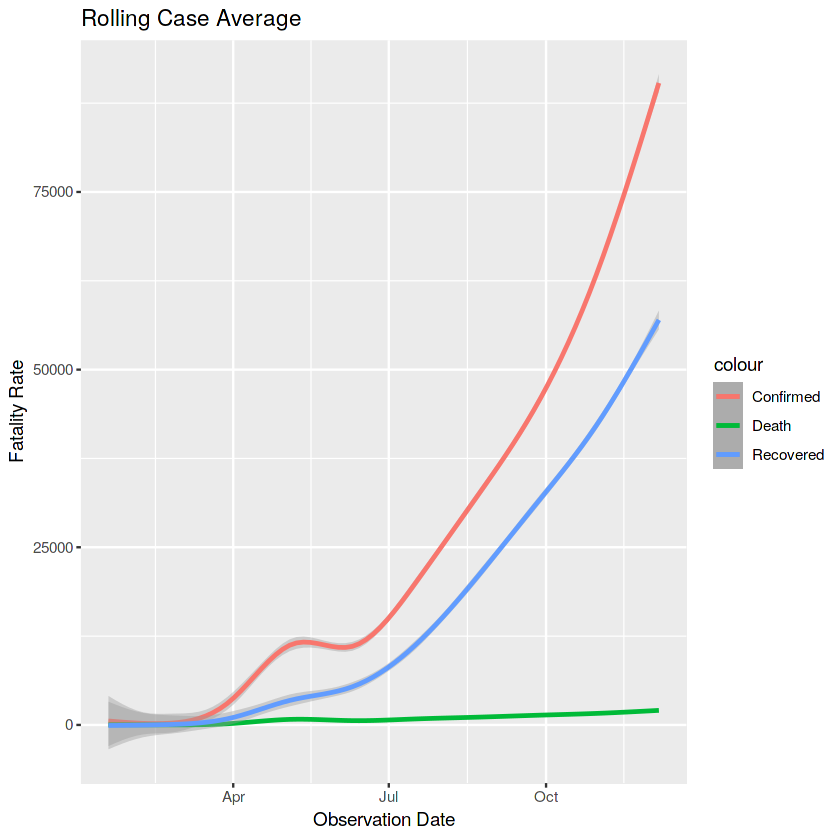

In [199]:
covid%>% group_by(ObservationDate=floor_date(ObservationDate,"1 week"))%>% summarise('Rolling Confirmed Cases'=rollmean(Confirmed,5),'Rolling Death Cases'=rollmean(Deaths,5),'Rolling Recovered Cases'=rollmean(Recovered,5))%>% ggplot()+geom_smooth(aes(x=ObservationDate,y=`Rolling Confirmed Cases`,color='Confirmed'))+geom_smooth(aes(x=ObservationDate,y=`Rolling Death Cases`,color='Death'))+geom_smooth(aes(x=ObservationDate,y=`Rolling Recovered Cases`,color='Recovered'))+xlab("Observation Date") + ylab("Fatality Rate")+ggtitle("Rolling Case Average")


Performing Clustering Analysis

In [200]:

#clusters=kmeans(covid$Confirmed,5)
#covid$cluster=as.factor(clusters$cluster)


In [201]:
covid %>% group_by(ObservationDate,`Country/Region`) %>% summarise(`Weekly Sum`=sum(Confirmed))

`summarise()` regrouping output by 'ObservationDate' (override with `.groups` argument)



ObservationDate,Country/Region,Weekly Sum
<date>,<chr>,<dbl>
2020-01-22,Hong Kong,0
2020-01-22,Japan,2
2020-01-22,Macau,1
2020-01-22,Mainland China,547
2020-01-22,South Korea,1
2020-01-22,Taiwan,1
2020-01-22,Thailand,2
2020-01-22,US,1
2020-01-23,Australia,0


`summarise()` regrouping output by 'ObservationDate', 'Country/Region' (override with `.groups` argument)



ERROR: Error in do_one(nmeth): NA/NaN/Inf in foreign function call (arg 1)


ObservationDate,Country/Region,Deaths,Weekly Sum,Fatality_Rate,Recovery_Rate,cluster
<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2020-01-22,Hong Kong,0,0,NaN,NaN,2
2020-01-22,Japan,0,2,0.00000000,0.00000000,2
2020-01-22,Macau,0,1,0.00000000,0.00000000,2
2020-01-22,Mainland China,0,103,0.00000000,0.00000000,2
2020-01-22,Mainland China,17,444,0.03828829,0.06306306,2
2020-01-22,South Korea,0,1,0.00000000,0.00000000,2
2020-01-22,Taiwan,0,1,0.00000000,0.00000000,2
2020-01-22,Thailand,0,2,0.00000000,0.00000000,2
2020-01-22,US,0,1,0.00000000,0.00000000,2
